# MULTILAYER NN - TENSORFLOW 2.X

In [9]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.12.0
Python 3.11.2


In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [11]:
# Load MNIST dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [12]:
# Function to normalize images
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

# Apply normalization to train and test datasets
ds_train = ds_train.map(normalize_img)
ds_test = ds_test.map(normalize_img)

## Creating a sequential model

In [13]:
# Define the model with SGD optimizer
model_sgd = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Model Summary:

In [14]:
model_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compiling the model:

In [15]:
# Compile the model with SGD optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_sgd.compile(optimizer=sgd_optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

## Training the model:

In [16]:
# Train the model with SGD optimizer
history_sgd = model_sgd.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5


2024-02-23 16:19:07.862076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2024-02-23 16:19:07.863174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


ValueError: in user code:

    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/apple/Documents/Projects-Python/DeepLearningCode/lib/python3.11/site-packages/keras/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (28, 28)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(28, 28, 1), dtype=float32)
      • training=True
      • mask=None


## Evaluating the model:

In [ ]:
# Evaluate the model trained with SGD optimizer
test_loss_sgd, test_accuracy_sgd = model_sgd.evaluate(ds_test)
print('Test Accuracy (SGD):', test_accuracy_sgd)

## Evaluating ADAM:

In [ ]:
# Define the model with Adam optimizer
model_adam = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Compile the model with Adam optimizer
model_adam.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
# Train the model with Adam optimizer
history_adam = model_adam.fit(ds_train, epochs=5, validation_data=ds_test)

In [ ]:
# Evaluate the model trained with Adam optimizer
test_loss_adam, test_accuracy_adam = model_adam.evaluate(ds_test)
print('Test Accuracy (Adam):', test_accuracy_adam)

###Plot 

In [ ]:
import matplotlib.pyplot as plt

TypeError: 'ResourceVariable' object is not callable

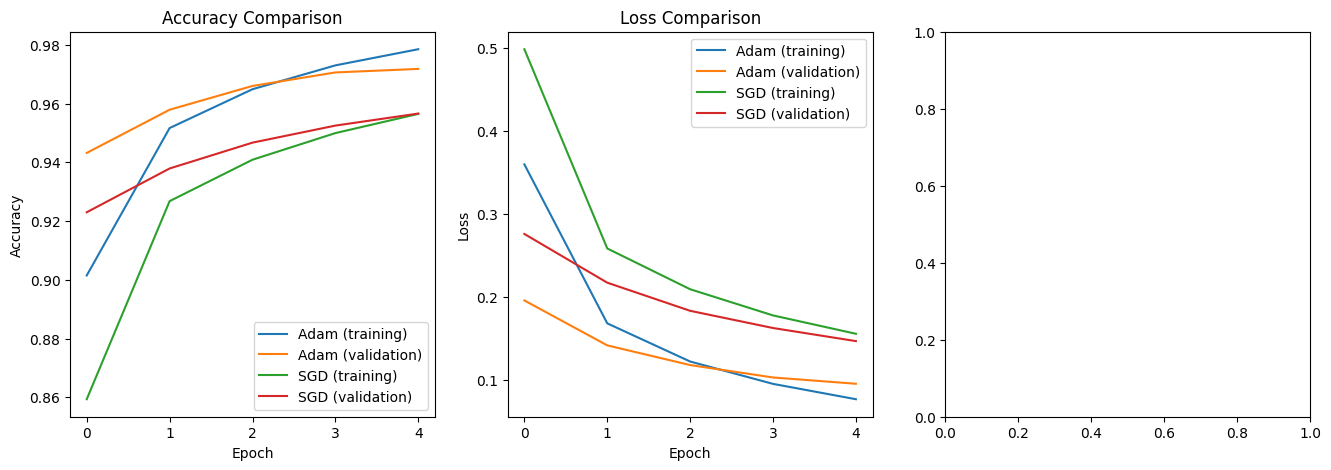

In [18]:
plt.figure(figsize=(16, 5))
# Plotting accuracy
plt.subplot(1, 3, 1)
plt.plot(history_adam.history['accuracy'], label='Adam (training)')
plt.plot(history_adam.history['val_accuracy'], label='Adam (validation)')
plt.plot(history_sgd.history['accuracy'], label='SGD (training)')
plt.plot(history_sgd.history['val_accuracy'], label='SGD (validation)')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 3, 2)
plt.plot(history_adam.history['loss'], label='Adam (training)')
plt.plot(history_adam.history['val_loss'], label='Adam (validation)')
plt.plot(history_sgd.history['loss'], label='SGD (training)')
plt.plot(history_sgd.history['val_loss'], label='SGD (validation)')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting learning rate and momentum for SGD
plt.subplot(1, 3, 3)
epochs = range(1, len(history_sgd.history['loss']) + 1)
plt.plot(epochs, sgd_optimizer.lr(history_sgd.epoch), label='Learning Rate')
plt.plot(epochs, sgd_optimizer.get_momentum(history_sgd.epoch), label='Momentum')
plt.title('SGD Learning Rate and Momentum')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()
